# Segunda lista de simulações de Dinâmica Estocástica

Autor da resolução: Danilo Lessa Bernardineli (NUSP 8944411)

In [1]:
# Dependências
import numpy as np # >= 1.12.0
import matplotlib.pyplot as plt # >= 2.0.0
from pylab import rcParams
rcParams['figure.figsize'] = (15, 5) # Ajuste do tamanho das figuras

## Simulação 1

Nessa simulação, será obtido o valor médio da quantidade de bolas na urna A no tempo ao considerar que a cada passo uma bolha é escolhida aleatoriamente e trocada de urna. Inicialmente todas as bolas estarão na urna A

In [2]:
N = 100  # total de bolas
corridas = 100
passos = 1000

n = N * np.ones(corridas) # numero de bolas na urna A
media = np.zeros(passos)
for i in range(passos):
    for j in range(corridas):
        p = n[j] / N
        if np.random.rand() <= p:
            n[j] -= 1            
        else:
            n[j] += 1
    media[i] = np.average(n)

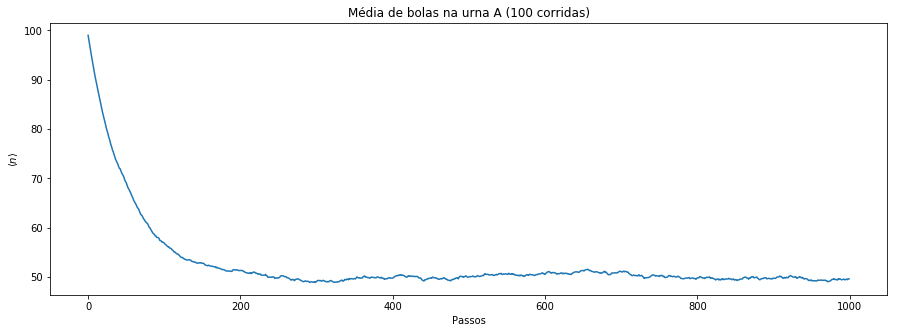

In [3]:
x = np.arange(passos)
y = media
plt.plot(x, y)
plt.title("Média de bolas na urna A (%s corridas)" % corridas)
plt.xlabel("Passos")
plt.ylabel("$\\langle n \\rangle$")
plt.show()

### Comentários

Nota-se que após cerca de 400 passos, a urna A passa a deter 50% das bolas em média, o que é o esperado inicialmente.

## Simulação 2

Nessa simulação, será escolhida uma bola por acaso e caso ela esteja na urna com menos bolas, ela será trocada de urna com probabilidade $q$. Caso contrário, ela será trocada com probabilidade $p = 1 - q$.

As urnas serão inicializadas com 50% das bolas em cada urna

In [4]:
N = 100
Niter = 1000000

# lista de q a serem testados
qList = [0.1, 0.5, 0.9, 0.95, 0.99]

output = np.zeros((Niter, len(qList)))

j = 0
for q in qList:    
    p = 1 - q    
    n = N / 2 # Quantidade de bolas na urna A
    
    for i in range(Niter):
        f = n / N
        
        # Escolher bola
        if f < np.random.rand():
            # Urna B            
            if (f <= 0.5):
                # Urna B tem a maioria das bolas
                if (q < np.random.rand()):
                    n += 1
            else:
                # Urna B tem a minoria das bolas
                if (p < np.random.rand()):
                    n += 1
        else:            
            # Urna A            
            if (f >= 0.5):    
                # Urna A tem a maioria das bolas
                if (q < np.random.rand()):
                    n -= 1
            else:
                # Urna A tem a minoria das bolas
                if (p < np.random.rand()):
                    n -= 1
                

        output[i, j] = n

    j += 1

In [5]:
# Função para fazer histogramas do resultado acima

def plot_output(i, N, Niter, qList, output):
    plt.hist(output[100000:, i] / N, normed=True, range=(0, 1), bins=101)
    plt.title("Distribuição de n/N para q=%s, %.0e iterações" % (qList[i], Niter))
    plt.ylabel("P(n/N)")
    plt.xlabel("n/N")
    plt.show()

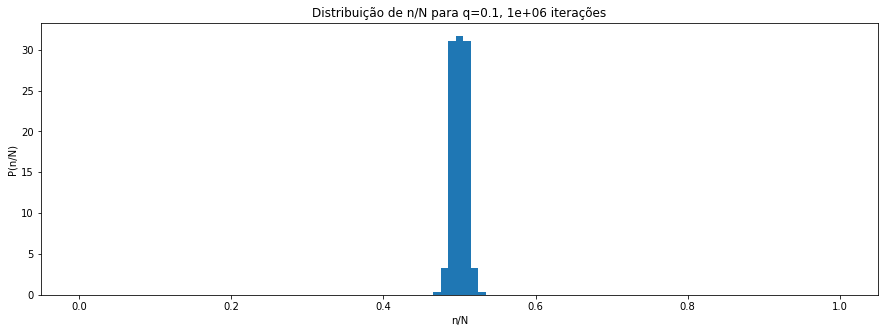

In [6]:
plot_output(0, N, Niter, qList, output)

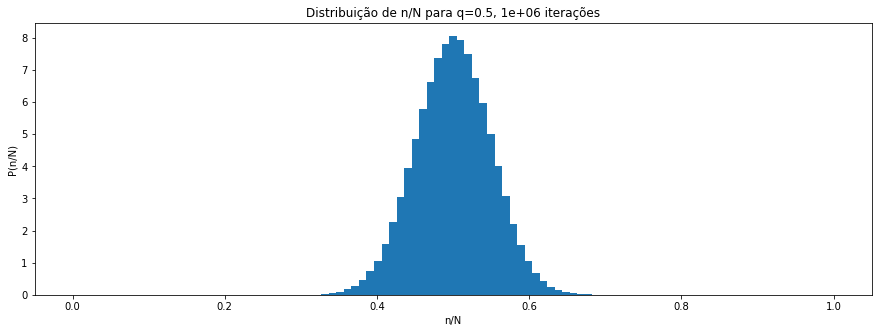

In [7]:
plot_output(1, N, Niter, qList, output)

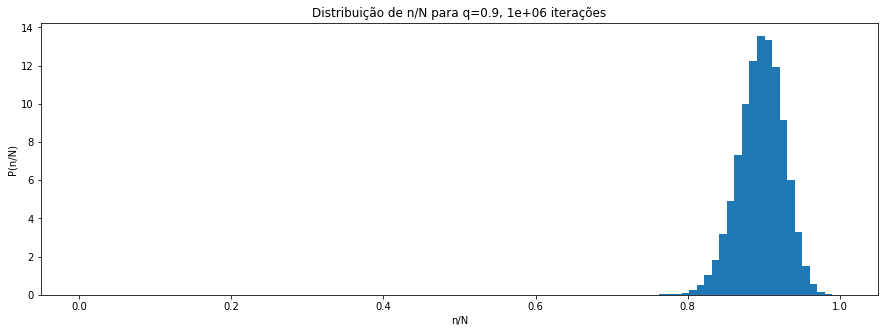

In [8]:
plot_output(2, N, Niter, qList, output)

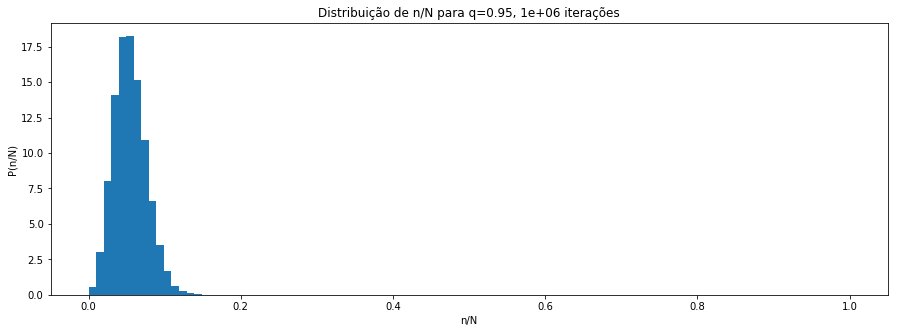

In [9]:
plot_output(3, N, Niter, qList, output)

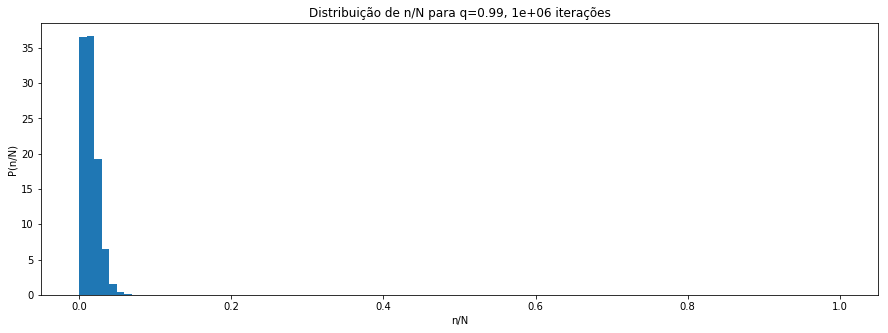

In [10]:
plot_output(4, N, Niter, qList, output)

### Comentários

Os histogramas seguem o esperado. Para $q \approx 0$, a distribuição deve ser similiar a uma descrita por um delta de Dirac em torno de 1/2.

Entre $q \in [0, 0.5]$, a distribuição é simétrica em torno de $\frac{n}{N} = 0.5$ enquanto que no intervalo $q \in [0.5, 1]$, $q$ tende a se deslocar para os extremos de $\frac{n}{N}$

Para $q \approx 1$, a distribuição tende a se concentrar em $\frac{n}{N} = 1$ ou $0$.

## Simulação 3

Nessa simulação,é escolhida uma bola aleatoriamente. Se ela estiver na urna B, há a probabilidade $p = 0.5(1 + \tanh{\frac{2n - N - 1}{NT}})$ dela ir para a urna A. 

Analogamente, se ela estiver na urna A, há a probabilidade $q = 0.5(1 - \tanh{\frac{2n - N - 1}{NT}})$ dela ir para a urna B.



In [11]:
def p(n, N, T):
    return (1 + np.tanh((2 * n - N + 1) / (N * T))) / 2

def q(n, N, T):
    return (1 - np.tanh((2 * n - N + 1) / (N * T))) / 2

N = 100
Niter = 1000000

tList = [0.5, 1, 2]

output = np.zeros((Niter, len(tList)))

j = 0
for T in tList:    
    n = N / 2 # Quantidade de bolas na urna A
    
    for i in range(Niter):
        f = n / N
        
        # Escolher bola
        if f < np.random.rand():
            # Urna B        
            if p(n, N, T) > np.random.rand():
                n += 1

        else:            
            # Urna A            
            if q(n, N, T) > np.random.rand():
                n -= 1                

        output[i, j] = n

    j += 1

In [12]:
# Função para fazer histogramas do resultado acima

def plot_output3(i, N, Niter, tList, output):
    plt.hist(output[100000:, i] / N, normed=True, range=(0, 1), bins=101)
    plt.title("Distribuição de n/N para T=%s, %.0e iterações" % (tList[i], Niter))
    plt.ylabel("P(n/N)")
    plt.xlabel("n/N")
    plt.show()

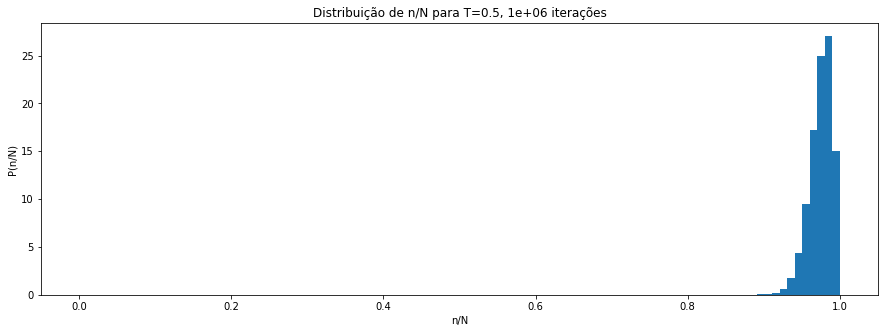

In [13]:
plot_output3(0, N, Niter, tList, output)

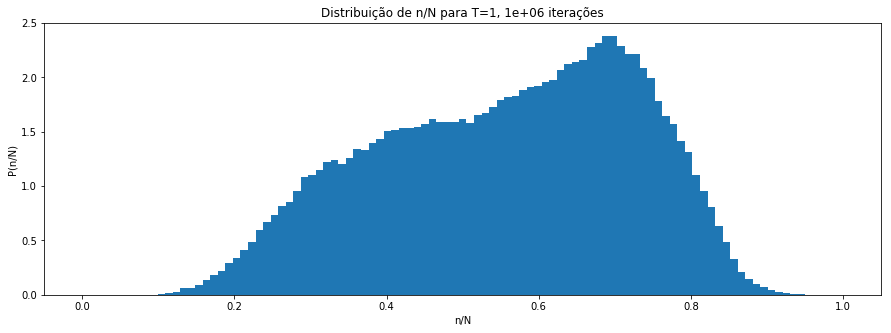

In [14]:
plot_output3(1, N, Niter, tList, output)

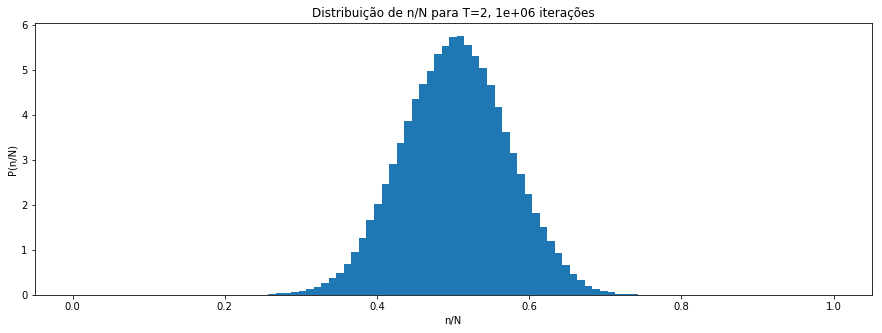

In [15]:
plot_output3(2, N, Niter, tList, output)